In [1]:
import functions.q_generator as qg
import functions.data_preperation as dp
import functions.stock_corr as sc

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt


In [2]:
tickers = [
    # S&P 500 (10)
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA", "JNJ", "V", "JPM",
    
    # Euro Stocks (5)
    "SAP.DE", "AIR.PA", "NESN.SW", "OR.PA",
    
    # FTSE 100 (5)
    "HSBA.L", "BP.L", "GSK.L", "VOD.L", "RIO.L", "LLOY.L",
    
    # Other Global Stocks (5)
    "TSM", "BABA", "SONY", "TCEHY", "TM"
]

num_tickers = len(tickers)



/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  25 of 25 completed
/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[("OC_next", ticker)] = close_next - open_next
/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

Price            Close                                                  \
Ticker            AAPL      AIR.PA        AMZN        BABA        BP.L   
Date                                                                     
2025-09-25  256.869995  193.860001  218.149994  175.470001  440.149994   
2025-09-26  255.460007  195.720001  219.779999  171.910004  445.500000   
2025-09-29  254.429993         NaN  222.169998  179.899994         NaN   
2025-09-30  254.630005         NaN  219.570007  178.729996         NaN   
2025-10-01  255.449997  199.080002  220.630005  182.779999  427.750000   

Price                                                                ...  \
Ticker           GOOGL   GSK.L       HSBA.L         JNJ         JPM  ...   
Date                                                                 ...   
2025-09-25  245.789993  1470.5  1025.199951  177.729996  313.450012  ...   
2025-09-26  246.539993  1486.0  1038.800049  179.710007  316.059998  ...   
2025-09-29  244.050003     

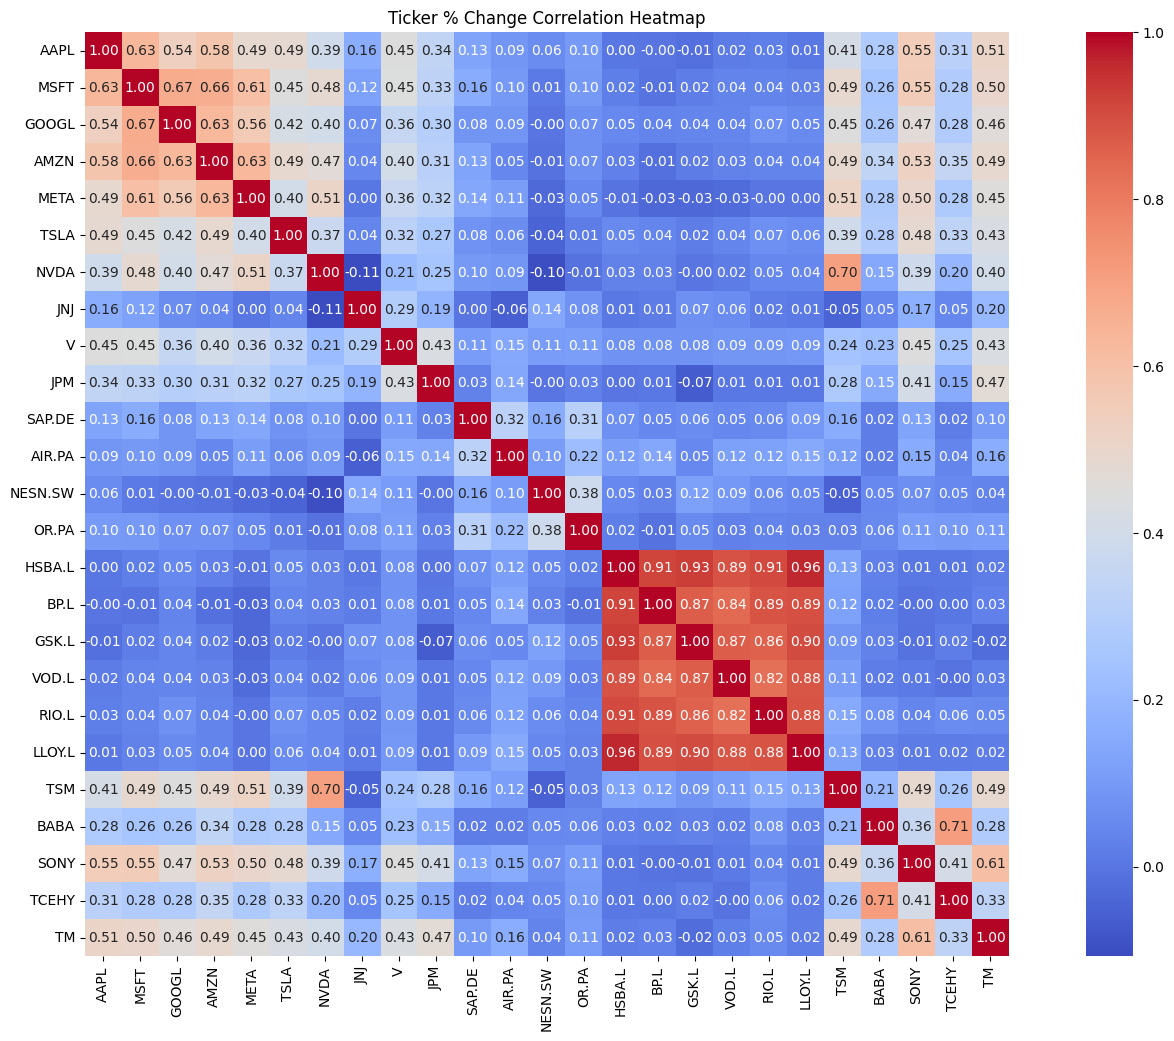

In [3]:

data = dp.download_stock_data(tickers, years=5)
data.dropna()
print(data.tail())
for t in tickers:
    data = dp.add_OC_CO_next_changes(data, t)

#data = dp.remove_na(data)

dp.plot_tickers_pct_change_corr(data, tickers, title="Ticker % Change Correlation Heatmap")

In [4]:
pct_change_cols = [(f"OC_next", t) for t in tickers]
df_pct = data[pct_change_cols].copy()

# Flatten columns for convenience
df_pct.columns = [t for _, t in df_pct.columns]

# Compute correlation
corr = df_pct.corr().abs()


corr

,AAPL,MSFT,GOOGL,AMZN,META,TSLA,NVDA,JNJ,V,JPM,...,BP.L,GSK.L,VOD.L,RIO.L,LLOY.L,TSM,BABA,SONY,TCEHY,TM
AAPL,1.000000,0.634769,0.536807,0.583938,0.485745,0.485096,0.392111,0.159347,0.446900,0.340569,...,0.001673,0.013655,0.017843,0.025862,0.006779,0.414319,0.281954,0.546755,0.313892,0.510536
MSFT,0.634769,1.000000,0.669980,0.664139,0.605714,0.447315,0.483405,0.124310,0.445833,0.328853,...,0.006199,0.019416,0.035954,0.039124,0.033339,0.485403,0.255282,0.551818,0.284501,0.502065
GOOGL,0.536807,0.669980,1.000000,0.630490,0.555664,0.417697,0.400430,0.065205,0.355361,0.301094,...,0.038071,0.040708,0.043282,0.073847,0.053704,0.448263,0.257904,0.467623,0.284607,0.461220
AMZN,0.583938,0.664139,0.630490,1.000000,0.630636,0.486047,0.465199,0.044740,0.403140,0.314528,...,0.012921,0.015358,0.031860,0.039600,0.035991,0.489588,0.335530,0.525728,0.351069,0.488755
META,0.485745,0.605714,0.555664,0.630636,1.000000,0.402377,0.507884,0.001526,0.364720,0.324825,...,0.034033,0.033975,0.026508,0.001652,0.000127,0.514886,0.277662,0.498605,0.275339,0.454827
TSLA,0.485096,0.447315,0.417697,0.486047,0.402377,1.000000,0.372227,0.042345,0.318821,0.267193,...,0.040626,0.021031,0.043005,0.070741,0.059758,0.390242,0.283312,0.483942,0.333195,0.427199
NVDA,0.392111,0.483405,0.400430,0.465199,0.507884,0.372227,1.000000,0.107157,0.213897,0.249445,...,0.031409,0.001267,0.015746,0.047096,0.044970,0.702748,0.145941,0.388330,0.196799,0.400013
JNJ,0.159347,0.124310,0.065205,0.044740,0.001526,0.042345,0.107157,1.000000,0.291234,0.185140,...,0.014460,0.074130,0.059491,0.021485,0.012375,0.045805,0.048503,0.172961,0.048358,0.202221
V,0.446900,0.445833,0.355361,0.403140,0.364720,0.318821,0.213897,0.291234,1.000000,0.432622,...,0.075722,0.082912,0.091412,0.087880,0.093569,0.243947,0.229388,0.447031,0.249379,0.432431
JPM,0.340569,0.328853,0.301094,0.314528,0.324825,0.267193,0.249445,0.185140,0.432622,1.000000,...,0.007600,0.065379,0.005687,0.005963,0.007795,0.277431,0.151594,0.406226,0.153899,0.470047


In [5]:
def get_most_correlated_pairs(corr: pd.DataFrame, top_x: int = 1):
    """
    For each stock, pick its top X most correlated stocks and form unique sets.
    
    Parameters
    ----------
    corr : pd.DataFrame
        Absolute correlation matrix (tickers x tickers)
    top_x : int
        Number of closest correlated stocks to include per stock.
    
    Returns
    -------
    List[set]
        List of unique sets of correlated tickers.
    """
    tickers = corr.columns
    added_sets = []

    for t in tickers:
        # Get correlations of this stock with all others, sorted descending
        sorted_corr = corr[t].sort_values(ascending=False)
        # Exclude self
        sorted_corr = sorted_corr[sorted_corr.index != t]

        count = 0
        for other_ticker in sorted_corr.index:
            pair_set = {t, other_ticker}

            # Check if this set already exists
            if not any(pair_set == s for s in added_sets):
                added_sets.append(pair_set)
                count += 1

            if count >= top_x:
                break

    return added_sets


In [6]:
top_pairs = get_most_correlated_pairs(corr, top_x=1)
print(top_pairs)
print(f"Total unique pairs: {len(top_pairs)}")




[{'MSFT', 'AAPL'}, {'MSFT', 'GOOGL'}, {'GOOGL', 'AMZN'}, {'MSFT', 'AMZN'}, {'META', 'AMZN'}, {'TSLA', 'AMZN'}, {'TSM', 'NVDA'}, {'V', 'JNJ'}, {'V', 'SONY'}, {'JPM', 'TM'}, {'SAP.DE', 'AIR.PA'}, {'OR.PA', 'AIR.PA'}, {'NESN.SW', 'OR.PA'}, {'SAP.DE', 'OR.PA'}, {'HSBA.L', 'LLOY.L'}, {'HSBA.L', 'BP.L'}, {'GSK.L', 'HSBA.L'}, {'HSBA.L', 'VOD.L'}, {'HSBA.L', 'RIO.L'}, {'GSK.L', 'LLOY.L'}, {'TSM', 'META'}, {'BABA', 'TCEHY'}, {'SONY', 'TM'}, {'SONY', 'TCEHY'}, {'TM', 'AAPL'}]
Total unique pairs: 25


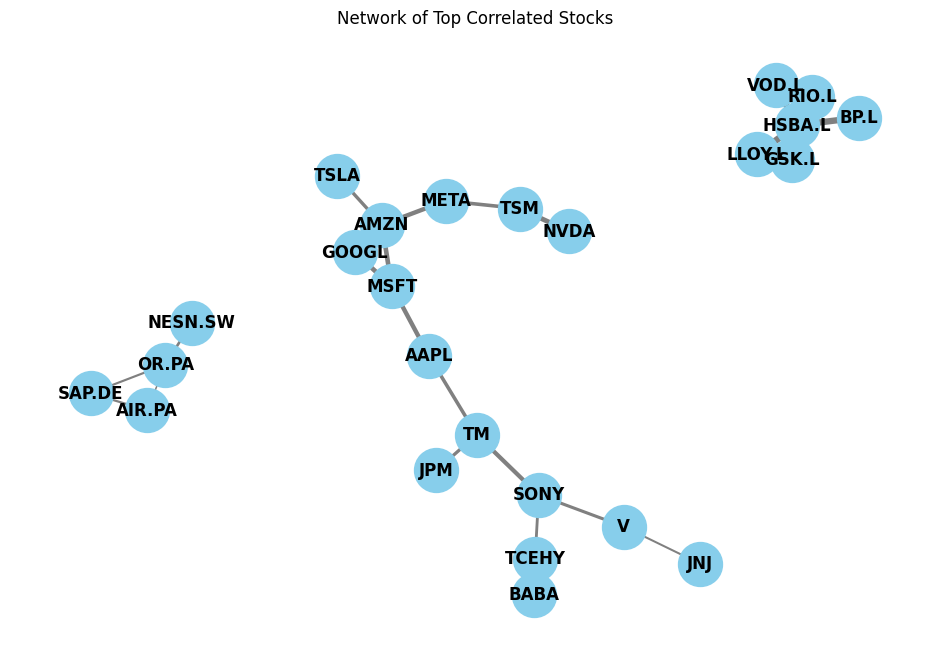

In [7]:
# Assuming top_pairs is your list of sets
G = nx.Graph()

# Add edges for each pair
for pair in top_pairs:
    stock1, stock2 = tuple(pair)
    # Use correlation as edge weight (optional)
    weight = corr.loc[stock1, stock2]
    G.add_edge(stock1, stock2, weight=weight)

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # force-directed layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')

# Draw edges with thickness proportional to correlation
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[d['weight']*5 for (_, _, d) in edges],  # scale thickness
    edge_color='gray'
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("Network of Top Correlated Stocks")
plt.axis('off')
plt.show()

In [8]:
def connect_components_by_highest_corr(G, corr):
    """
    Connect disconnected components of G by adding edges with the highest correlation
    until the graph is fully connected.
    """
    while not nx.is_connected(G):
        components = list(nx.connected_components(G))
        # Find the pair of nodes across different components with highest correlation
        max_corr = -1
        best_pair = None
        
        for i in range(len(components)):
            for j in range(i+1, len(components)):
                comp_i = components[i]
                comp_j = components[j]
                for node_i in comp_i:
                    for node_j in comp_j:
                        if corr.loc[node_i, node_j] > max_corr:
                            max_corr = corr.loc[node_i, node_j]
                            best_pair = (node_i, node_j)
        
        # Add the edge with highest correlation
        if best_pair:
            G.add_edge(*best_pair, weight=max_corr)
            
    return G

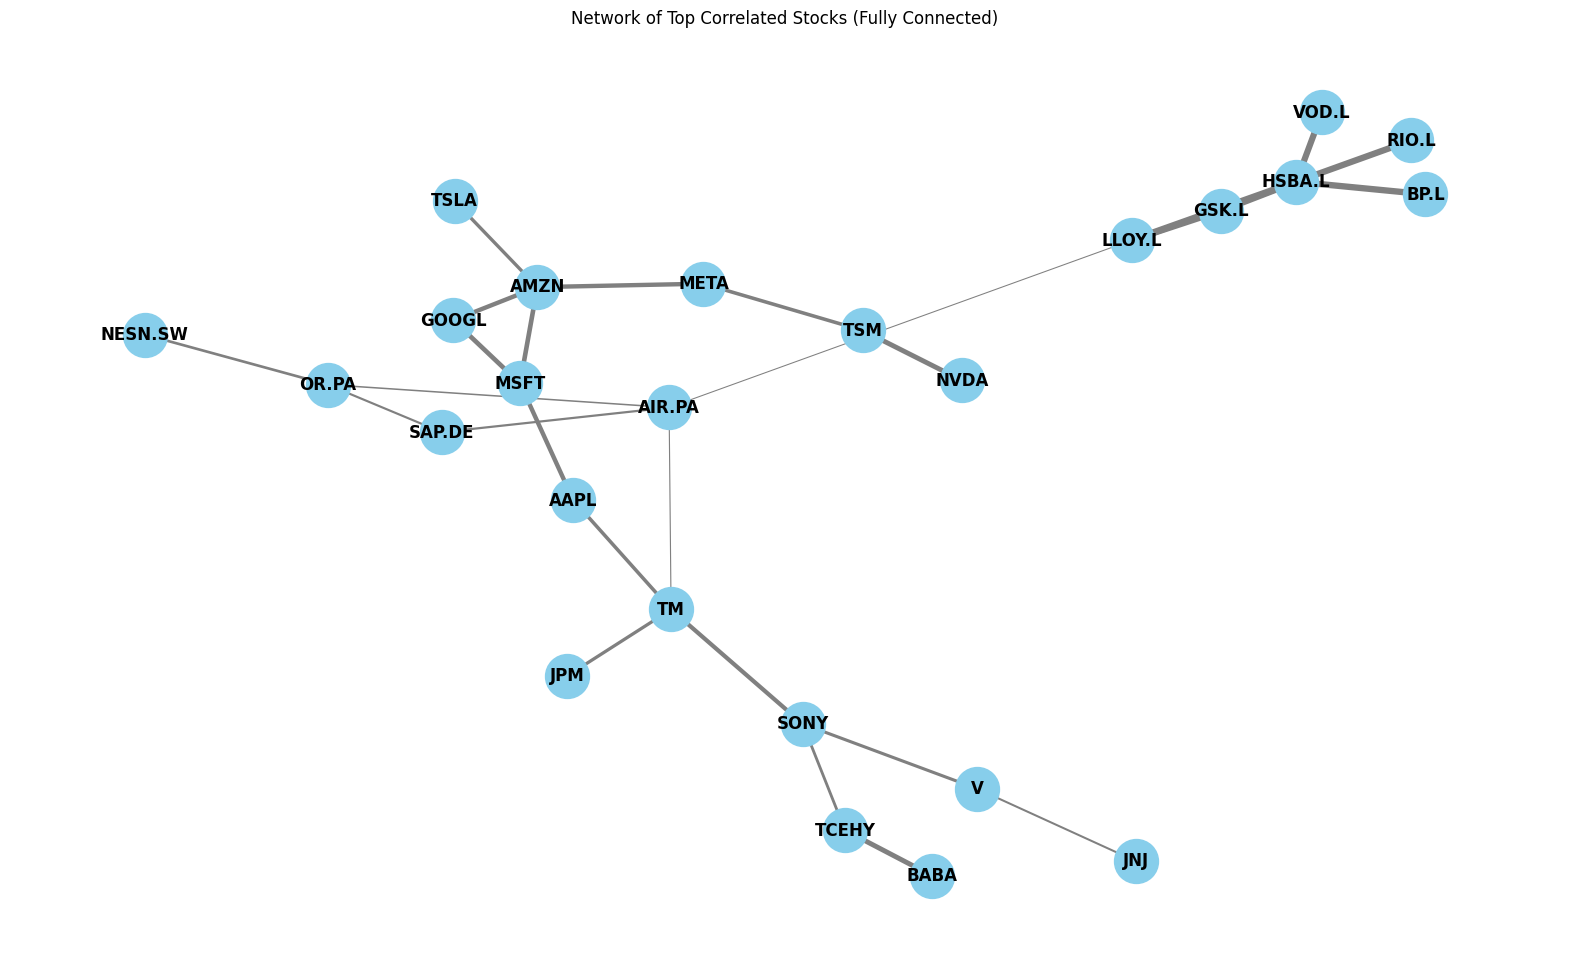

In [9]:
# Usage
G_connected = connect_components_by_highest_corr(G, corr)

# Now draw as before
plt.figure(figsize=(20, 12))
pos = nx.spring_layout(G_connected, seed=42)
nx.draw_networkx_nodes(G_connected, pos, node_size=1000, node_color='skyblue')
edges = G_connected.edges(data=True)
nx.draw_networkx_edges(G_connected, pos, edgelist=edges, width=[d['weight']*5 for (_, _, d) in edges], edge_color='gray')
nx.draw_networkx_labels(G_connected, pos, font_size=12, font_weight='bold')
plt.title("Network of Top Correlated Stocks (Fully Connected)")
plt.axis('off')
plt.show()

In [10]:
edges_list = list(G_connected.edges())
print(edges_list)


[('MSFT', 'AAPL'), ('MSFT', 'GOOGL'), ('MSFT', 'AMZN'), ('AAPL', 'TM'), ('GOOGL', 'AMZN'), ('AMZN', 'META'), ('AMZN', 'TSLA'), ('META', 'TSM'), ('TSM', 'NVDA'), ('V', 'JNJ'), ('V', 'SONY'), ('SONY', 'TM'), ('SONY', 'TCEHY'), ('JPM', 'TM'), ('TM', 'AIR.PA'), ('SAP.DE', 'AIR.PA'), ('SAP.DE', 'OR.PA'), ('AIR.PA', 'OR.PA'), ('AIR.PA', 'LLOY.L'), ('OR.PA', 'NESN.SW'), ('HSBA.L', 'LLOY.L'), ('HSBA.L', 'BP.L'), ('HSBA.L', 'GSK.L'), ('HSBA.L', 'VOD.L'), ('HSBA.L', 'RIO.L'), ('LLOY.L', 'GSK.L'), ('BABA', 'TCEHY')]


In [11]:
edges_list = sc.top_bottom_edges_list(data,outputs = ["OC_next", "CO_next"])
print(edges_list[0])
print(edges_list[1])
set_edges_0 = set(frozenset(e) for e in edges_list[0])
set_edges_1 = set(frozenset(e) for e in edges_list[1])
diff = set_edges_0 ^ set_edges_1

diff

[('MSFT', 'AAPL'), ('MSFT', 'GOOGL'), ('MSFT', 'AMZN'), ('AAPL', 'TM'), ('GOOGL', 'AMZN'), ('AMZN', 'META'), ('AMZN', 'TSLA'), ('META', 'TSM'), ('TSM', 'NVDA'), ('V', 'JNJ'), ('V', 'SONY'), ('SONY', 'TM'), ('SONY', 'TCEHY'), ('JPM', 'TM'), ('TM', 'AIR.PA'), ('SAP.DE', 'AIR.PA'), ('SAP.DE', 'OR.PA'), ('AIR.PA', 'OR.PA'), ('AIR.PA', 'LLOY.L'), ('OR.PA', 'NESN.SW'), ('HSBA.L', 'LLOY.L'), ('HSBA.L', 'BP.L'), ('HSBA.L', 'GSK.L'), ('HSBA.L', 'VOD.L'), ('HSBA.L', 'RIO.L'), ('LLOY.L', 'GSK.L'), ('BABA', 'TCEHY')]
[('V', 'AAPL'), ('V', 'JNJ'), ('V', 'JPM'), ('V', 'TM'), ('AAPL', 'TSLA'), ('META', 'MSFT'), ('META', 'AMZN'), ('META', 'NVDA'), ('GOOGL', 'AMZN'), ('AMZN', 'JPM'), ('AMZN', 'TSM'), ('NVDA', 'TSM'), ('TSM', 'HSBA.L'), ('SAP.DE', 'AIR.PA'), ('SAP.DE', 'LLOY.L'), ('AIR.PA', 'LLOY.L'), ('AIR.PA', 'NESN.SW'), ('AIR.PA', 'OR.PA'), ('LLOY.L', 'HSBA.L'), ('LLOY.L', 'BP.L'), ('LLOY.L', 'GSK.L'), ('LLOY.L', 'VOD.L'), ('BP.L', 'RIO.L'), ('RIO.L', 'TCEHY'), ('BABA', 'TCEHY'), ('SONY', 'TM')]


{frozenset({'META', 'TSM'}),
 frozenset({'BP.L', 'HSBA.L'}),
 frozenset({'RIO.L', 'TCEHY'}),
 frozenset({'SONY', 'V'}),
 frozenset({'META', 'MSFT'}),
 frozenset({'AAPL', 'MSFT'}),
 frozenset({'OR.PA', 'SAP.DE'}),
 frozenset({'AIR.PA', 'NESN.SW'}),
 frozenset({'AMZN', 'JPM'}),
 frozenset({'AMZN', 'TSM'}),
 frozenset({'AMZN', 'TSLA'}),
 frozenset({'META', 'NVDA'}),
 frozenset({'AAPL', 'V'}),
 frozenset({'AAPL', 'TSLA'}),
 frozenset({'NESN.SW', 'OR.PA'}),
 frozenset({'AMZN', 'MSFT'}),
 frozenset({'LLOY.L', 'VOD.L'}),
 frozenset({'HSBA.L', 'RIO.L'}),
 frozenset({'AAPL', 'TM'}),
 frozenset({'GOOGL', 'MSFT'}),
 frozenset({'BP.L', 'LLOY.L'}),
 frozenset({'JPM', 'V'}),
 frozenset({'BP.L', 'RIO.L'}),
 frozenset({'LLOY.L', 'SAP.DE'}),
 frozenset({'SONY', 'TCEHY'}),
 frozenset({'JPM', 'TM'}),
 frozenset({'HSBA.L', 'TSM'}),
 frozenset({'AIR.PA', 'TM'}),
 frozenset({'HSBA.L', 'VOD.L'}),
 frozenset({'TM', 'V'}),
 frozenset({'GSK.L', 'HSBA.L'})}

In [12]:
from IPython.display import display
custom = qg.custom_parameterized_circuit(group_sizes=len(tickers)*[2], tickers=tickers, reps=2, entanglement_maps=edges_list)
custom.draw('text',fold =-1)


┌───────────────┐┌───────────────┐┌───────────────┐   ┌───────────────┐ ┌───────────────┐                            ┌───────────────┐ ┌───────────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 q_0: ┤ Rx(theta0[0]) ├┤ Ry(theta0[1]) ├┤ Rz(theta0[2]) ├─■─┤ Ry(theta1[0]) ├─┤ Rz(theta1[1]) ├──■───────────────────────■─┤ Ry(theta2[0]) ├─┤ Rz(theta2[1]) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ├───────────────┤├───────────────┤├───────────────┤ │ ├───────────────┤ ├───────────────┤  │                       │ └───────────────┘ ├───────────────┤ ┌───────────────┐                                                                                                                                                                                                                                                                                                                                                                                                                               
 q_1: ┤ Rx(theta0[3]) ├┤ Ry(theta0[4]) ├┤ Rz(theta0[5]) ├─■─┤ Ry(theta1[2]) ├─┤ Rz(theta1[3]) ├──┼──■────────────────────┼─────────■─────────┤ Ry(theta2[2]) ├─┤ Rz(theta2[3]) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ├───────────────┤├───────────────┤├───────────────┤   ├───────────────┤ ├───────────────┤  │  │                    │         │         └───────────────┘ └───────────────┘ ┌───────────────┐ ┌───────────────┐                                                                                                                                                                                                                                                                                                                                                                                           
 q_2: ┤ Rx(theta0[0]) ├┤ Ry(theta0[1]) ├┤ Rz(theta0[2]) ├─■─┤ Ry(theta1[4]) ├─┤ Rz(theta1[5]) ├──■──┼─────────■──────────┼─────────┼───────────────────────────────────■─────────┤ Ry(theta2[4]) ├─┤ Rz(theta2[5]) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ├───────────────┤├───────────────┤├───────────────┤ │ ├───────────────┤ ├───────────────┤     │         │          │         │         ┌───────────────┐         │         ├───────────────┤ └───────────────┘                                                                                                                                                                                                                                                  